# Taller 1 - Transformaciones Básicas en Computación Visual

**Gabriela Gallegos Rubio**

* Crear una figura 2D con puntos o formas
* Aplicar traslación, rotación y escala usando matrices de transformación
* Generar una animación (usando bucles o interpolación)
* Animar la transformación en función del tiempo (t) o del frame
* Exportar como GIF animado con imageio
* Opcional: mostrar la matriz resultante de cada transformación y cómo cambia con el tiempo


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os

# Creación de la figura corazón

Se utilizan ecuaciones paramétricas para formar dicha figura.


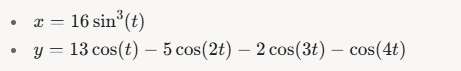

In [2]:
def create_heart(num_points=100):
    t = np.linspace(0, 2 * np.pi, num_points)
    x = 16 * np.sin(t)**3
    y = 13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t)
    points = np.array([x, y]) / 15  # Escalar para que quepa en los límites
    return points

# Matrices de transformación, rotación y escala

In [3]:
# Matrices de transformación
def translation_matrix(tx, ty):
    return np.array([[1, 0, tx],
                     [0, 1, ty],
                     [0, 0, 1]])

def rotation_matrix(theta):
    return np.array([[np.cos(theta), -np.sin(theta), 0],
                     [np.sin(theta), np.cos(theta), 0],
                     [0, 0, 1]])

def scale_matrix(sx, sy):
    return np.array([[sx, 0, 0],
                     [0, sy, 0],
                     [0, 0, 1]])

# Aplicar transformación a los puntos
def apply_transformation(points, matrix):
    points_homogeneous = np.vstack((points, np.ones(points.shape[1])))
    transformed = matrix @ points_homogeneous
    return transformed[:2, :]


# Animación

In [4]:
# Configuración de la animación
frames = 100
t = np.linspace(0, 2 * np.pi, frames)
images = []
points = create_heart()

# Plano de la figura
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Animación
for i in range(frames):

    # Parámetros de la animación
    tx = 1.5 * np.sin(t[i])  # Traslación en x
    ty = 1.5 * np.cos(t[i])  # Traslación en y
    theta = t[i]  # Rotación
    sx = 1 + 0.5 * np.sin(t[i])  # Escala en x
    sy = 1 + 0.5 * np.cos(t[i])  # Escala en y

    # Crear matrices de transformación
    T = translation_matrix(tx, ty)
    R = rotation_matrix(theta)
    S = scale_matrix(sx, sy)

    # Combinar transformaciones: T * R * S
    M = T @ R @ S

    # Aplicar transformación a los puntos
    transformed_points = apply_transformation(points, M)

    # Dibujar la figura
    ax.clear()
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_aspect('equal')
    ax.plot(np.append(transformed_points[0, :], transformed_points[0, 0]),
            np.append(transformed_points[1, :], transformed_points[1, 0]), 'r-')  # Cambié a rojo
    ax.fill(transformed_points[0, :], transformed_points[1, :], 'r', alpha=0.3)  # Relleno rojo

    # Guardar frame como imagen temporal
    temp_file = f"frame_{i}.png"
    plt.savefig(temp_file)
    images.append(imageio.imread(temp_file))
    os.remove(temp_file)

# Exportar como GIF
imageio.mimsave('Corazon.gif', images, fps=30)
plt.close()

<ipython-input-4-3a4c9726a15c>:46: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(temp_file))
